### Automated EDA
    Author      :   Mareez Adel
    Date        :   1 May,2024
    Project     :   Automated Exploratory Data Analysis
This innovative tool aims to enhance the efficiency of the EDA process by automating data pre-processing and generating a visualization dashboard specifically tailored for each type of column using Python.

Key Features:
- Data Reading
- Data Pre-processing
- User-Friendly Interface

### Import Libraries

In [1]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### The AutomatedEDA class

In [2]:
class AutomatedEDA:
    def __init__(self , file_path = None):
        self.DataFrame = None
        if file_path:
            self.read_data(file_path)


    def read_data(self , file_path , file_format = None):
        """
        Read data from different file formats.
        
        Parameters:
        - file_path
        - file_format
        
        Returns:
        - Loaded Data Frame
        """
        try:
            if file_format is None:
                file_format = file_path.split('.')[-1]
                file_format = file_format.lower()
            read_functions = {
                                'csv'  : pd.read_csv,
                                'excel': pd.read_excel,
                                'xlsx': pd.read_excel,
                                'json' : pd.read_json,
                                'jsonl': pd.read_json,
                                'hdf5': pd.read_hdf
                             }
            if file_format not in read_functions:
                 raise ValueError(f"unsupported file format: {file_format}")
            self.DataFrame = read_functions[file_format](file_path)
            return self.DataFrame
        except FileNotFoundError:
            print(f"File '{file_path}' not found.")
        except Exception as e:
            print(f"Error reading data: {str(e)}")


    def handle_missing_values(self , columns = None , strategy ='remove'):
        """
        Handle missing values in the Data Frame.
        
        Parameters:
        - columns
        - strategy
        """
        try:
            if columns is None:
                columns = self.DataFrame.columns
            if strategy == 'remove':
                self.DataFrame.dropna(subset=columns , inplace=True)
            elif strategy == 'mean':
                fill_value = self.DataFrame[columns].mean()
                self.DataFrame[columns] = self.DataFrame[columns].fillna(fill_value)
            elif strategy == 'median':
                fill_value = self.DataFrame[columns].median()
                self.DataFrame[columns] = self.DataFrame[columns].fillna(fill_value)
            else:
                print("Unsupported strategy")
        except Exception as e:
            print(f"Error handling missing values: {str(e)}")


    def summarize_data(self , columns=None):
        """
        Generate summary statistics for the Data Frame.
        
        Parameters:
        - columns
        
        Returns:
        - Summary statistics for Data Frame.
        """
        try:
            if columns is None:
                columns = self.DataFrame.columns
            summary = self.DataFrame[columns].describe()
            print("Data Summary: ")
            print(summary)
            return summary
        except Exception as e:
            print(f"Error generating data summary: {str(e)}")


    def encode_categorical_data(self , columns = None):
        """
        Encode categorical data in the Data Frame.
        
        Parameters:
        - columns
        
        Returns:
        - Data Frame
        """
        try:
            if columns is None:
                columns = self.DataFrame.select_dtypes(include=['object']).columns
            for column in columns:
                self.DataFrame[column] = self.DataFrame[column].astype('category').cat.codes
            return self.DataFrame
        except Exception as e:
            print(f"Error encoding categorical data: {str(e)}")
        return None
        

    def data_description(self):
        """
        Generate an overview of the data including the first 5 rows, data types, column names, and missing values.
        """
        try:
            print("Data Overview: ")
            print(self.DataFrame.head(5))
            print('-' * 50)
            print('\n')

            print("Columns Names: ")
            print(self.DataFrame.columns)
            print('-' * 50)
            print('\n')

            print("Columns with missing values: ")
            print(self.DataFrame.isna().sum())
            print('-' * 50)
            print('\n')
        except Exception as e:
            print(f"Error generating data description: {str(e)}")


    def plot_histograms_plots(self , x):
        """
        Plot histograms for the specified column.
        
        Parameters:
        - Column name.
        """
        try:
            sns.histplot(self.DataFrame[x], kde=True)
            plt.title(f'Histogram of {x}')
            plt.xlabel(x)
            plt.ylabel('Frequency')
            plt.show()
        except Exception as e:
            print(f"Error plotting histograms: {str(e)}") 


    def plot_scatter_plots(self , x , y):
        """
        Plot scatter plots for two specified columns.
        
        Parameters:
        - X-axis column name.
        - Y-axis column name.
        """
        try:
            sns.scatterplot(data=self.DataFrame , x=x , y=y)
            plt.title(f'Scatter Plot of {x} vs {y}')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()
        except Exception as e:
            print(f"Error plotting scatter plots: {str(e)}")

    def plot_box_plots(self , x):
        """
        Plot box plots for the specified column.
        
        Parameters:
        - Column name.
        """
        try:
            sns.boxplot(data=self.DataFrame , y=x)
            plt.title(f'Box Plot of {x}')
            plt.ylabel(x)
            plt.show()
        except Exception as e:
            print(f"Error plotting box plots: {str(e)}")

    def plot_count_plots(self , x):
        """
        Plot count plots for the specified column.
        
        Parameters:
        - Column name.
        """
        try:
            sns.countplot(data=self.DataFrame , x=x)
            plt.title(f'Count Plot of {x}')
            plt.xlabel(x)
            plt.ylabel('Count')
            plt.xticks(rotation=90)
            plt.show()
        except Exception as e:
            print(f"Error plotting count plots: {str(e)}")

    def plot_bar_plots(self , x , y):
        """
        Plot bar plots for the specified columns.
        
        Parameters:
        - X-axis column name.
        - Y-axis column name.
        """
        try:
            sns.barplot(data=self.DataFrame , x=x , y=y)
            plt.title(f'Bar Plot of {x} vs {y}')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.xticks(rotation=90)
            plt.show()
        except Exception as e:
            print(f"Error plotting bar plots: {str(e)}")

### User-Friendly Interface using TKinter

Data Overview: 
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          119

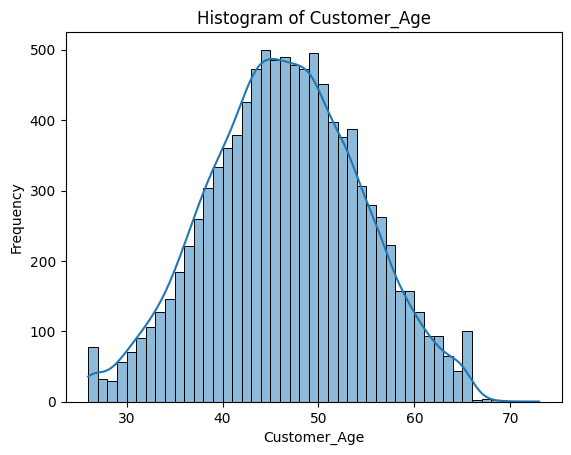

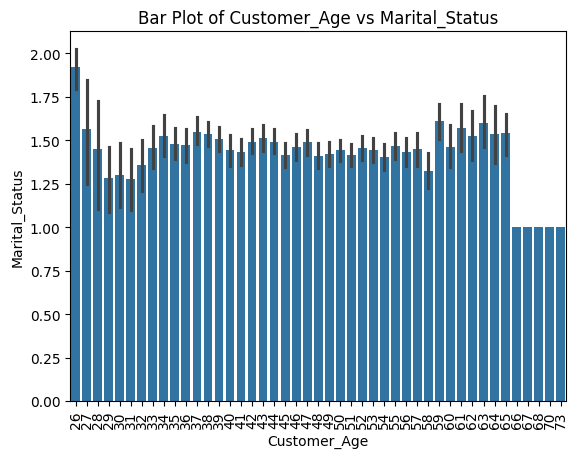

In [35]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from tkinter import simpledialog

class EDAApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Automated EDA")
        self.root.geometry("700x400")

        self.file_path = None
        self.eda = AutomatedEDA()

        self.root.pack_propagate(False)

        self.create_widgets()

    def create_widgets(self):
        self.file_label = tk.Label(self.root , text="File Path:")
        self.file_label.grid(row=0 , column=0 , padx = (60,0) , pady=15)
 
        self.file_entry = tk.Entry(self.root , width=65)
        self.file_entry.grid(row=0 , column=1 , padx = (30,0) , pady=15)

        self.browse_button = tk.Button(self.root , text="Browse" , command=self.browse_file)
        self.browse_button.grid(row=0 , column=2 , padx = (30,0) , pady=15)

        self.run_button = tk.Button(self.root , text="Run EDA" , command=self.run_eda)
        
        self.encode_button = tk.Button(self.root , text="Encode Categorical Data" , command=self.encode)

        self.handle_missing_button = tk.Button(self.root , text="Handle Missing Data" , command=self.handle_missing)
        
        self.plot_histograms_button = tk.Button(self.root , text="Plot Histogram" , command=self.plot_histograms)
        
        self.plot_box_button = tk.Button(self.root , text="Plot Box" , command=self.plot_box)
        
        self.plot_count_button = tk.Button(self.root , text="Plot Count" , command=self.plot_count)
        
        self.plot_scatter_button = tk.Button(self.root , text="Plot Scatter" , command=self.plot_scatter)
        
        self.plot_bar_button = tk.Button(self.root , text="Plot Bar" , command=self.plot_bar)

        self.column_label = tk.Label(self.root , text="Select Column X:")
        self.column_var = tk.StringVar(self.root)
        self.column_dropdown = tk.OptionMenu(self.root , self.column_var , "")

        self.column_label_2 = tk.Label(self.root, text="Select Column Y:")
        self.column_var_2 = tk.StringVar(self.root)
        self.column_dropdown_2 = tk.OptionMenu(self.root, self.column_var_2, "")


    def browse_file(self):
        self.file_path = filedialog.askopenfilename()
        self.file_entry.delete(0 , tk.END)
        self.file_entry.insert(0 , self.file_path)

        if self.file_path:
            self.eda.read_data(self.file_path)
            self.populate_column_dropdowns()
            if not self.run_button.winfo_ismapped():
                self.run_button.grid(row=1, column=0, columnspan=3, pady=15)

        
    def populate_column_dropdowns(self):
        columns = self.eda.DataFrame.columns.tolist()

        # Populate dropdown 1
        self.column_dropdown['menu'].delete(0, 'end')
        for column in columns:
            self.column_dropdown['menu'].add_command(label=column, command=tk._setit(self.column_var, column))

        # Populate dropdown 2
        self.column_dropdown_2['menu'].delete(0, 'end')
        for column in columns:
            self.column_dropdown_2['menu'].add_command(label=column, command=tk._setit(self.column_var_2, column))

    def run_eda(self):
        if not self.file_path:
            messagebox.showwarning("Warning", "Please select a file.")
            return

        try:
            self.eda = AutomatedEDA(self.file_path)

            self.eda.data_description()
            
            self.eda.summarize_data()
            
            self.run_button.grid_forget()
            
            self.encode_button.grid(row=2 , column=0 , padx=(15,0) , pady=5 , sticky="w")

            self.handle_missing_button.grid(row=2 , column=1 , padx=5)

            self.column_label.grid(row=3 , column=0 , padx=15 , sticky="w")
            
            self.column_dropdown.grid(row=3 , column=1 , padx=5 , pady=5 , sticky="w")

            self.column_label_2.grid(row=4, column=0, padx=15, sticky="w")
            
            self.column_dropdown_2.grid(row=4, column=1, padx=5, pady=5, sticky="w")
            
            self.plot_histograms_button.grid(row=3 , column=1 , padx=5 , pady=5)
            
            self.plot_box_button.grid(row=4 , column=1 , padx=5 , pady=5)
            
            self.plot_count_button.grid(row=5 , column=1 , padx=5 , pady=5)
            
            self.plot_scatter_button.grid(row=3 , column=2 , padx=5 , pady=5)
            
            self.plot_bar_button.grid(row=4 , column=2 , padx=5 , pady=5)
    
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")


    def encode(self):
        try:
            self.eda.encode_categorical_data()
            messagebox.showinfo("Info", f"Encoding done for the dataset.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")


    def handle_missing(self):

        column_name = self.column_var.get()
        if not column_name:
            messagebox.showwarning("Warning", "Please select a column.")
            return

        try:
            self.eda.handle_missing_values(column_name)
            messagebox.showinfo("Info", f"Missing values handled for column '{column_name}'.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    
    def plot_histograms(self):

        column_name = self.column_var.get()
        if not column_name:
            messagebox.showwarning("Warning", "Please select a column.")
            return

        try:
            self.eda.plot_histograms_plots(column_name)
            messagebox.showinfo("Info", f"Plotting Done '{column_name}'.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")


    def plot_box(self):

        column_name = self.column_var.get()
        if not column_name:
            messagebox.showwarning("Warning", "Please select a column.")
            return
        try:
            self.eda.plot_box_plots(column_name)
            messagebox.showinfo("Info", f"Plotting Done '{column_name}'.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    
    def plot_count(self):

        column_name = self.column_var.get()
        if not column_name:
            messagebox.showwarning("Warning", "Please select a column.")
            return
        try:
            self.eda.plot_count_plots(column_name)
            messagebox.showinfo("Info", f"Plotting Done '{column_name}'.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    
    def plot_scatter(self):

        column_name_1 = self.column_var.get()
        column_name_2 = self.column_var_2.get()
        if not column_name_1:
            messagebox.showwarning("Warning", "Please select a column for X axis.")
            return
        if not column_name_2:
            messagebox.showwarning("Warning", "Please select a column for Y axis.")
            return
        try:
            self.eda.plot_scatter_plots(column_name_1 , column_name_2)
            messagebox.showinfo("Info", f"Plotting Done '{column_name_1 , column_name_2}'.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    
    def plot_bar(self):

        column_name_1 = self.column_var.get()
        column_name_2 = self.column_var_2.get()
        if not column_name_1:
            messagebox.showwarning("Warning", "Please select a column for X axis.")
            return
        if not column_name_2:
            messagebox.showwarning("Warning", "Please select a column for Y axis.")
            return
        try:
            self.eda.plot_bar_plots(column_name_1 , column_name_2)
            messagebox.showinfo("Info", f"Plotting Done '{column_name_1 , column_name_2}'.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")


    def run(self):
        self.root.mainloop()

app = EDAApp()
app.run()